<a href="https://colab.research.google.com/github/2348536/Machine_Learning/blob/main/LAB3_ML_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
df=pd.read_csv('/content/drive/MyDrive/lab3 ml dataset.zip')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DATA PREPROCESSING

In [3]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7500, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
df.describe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<bound method NDFrame.describe of               shrimp            almonds      avocado    vegetables mix  \
0            burgers          meatballs         eggs               NaN   
1            chutney                NaN          NaN               NaN   
2             turkey            avocado          NaN               NaN   
3      mineral water               milk   energy bar  whole wheat rice   
4     low fat yogurt                NaN          NaN               NaN   
...              ...                ...          ...               ...   
7495          butter         light mayo  fresh bread               NaN   
7496         burgers  frozen vegetables         eggs      french fries   
7497         chicken                NaN          NaN               NaN   
7498        escalope          green tea          NaN               NaN   
7499            eggs    frozen smoothie  yogurt cake    low fat yogurt   

     green grapes whole weat flour yams cottage cheese energy drink  \
0     

MISSING VALUES

In [7]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

In [8]:
df=df.fillna(value=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'number of missing values')

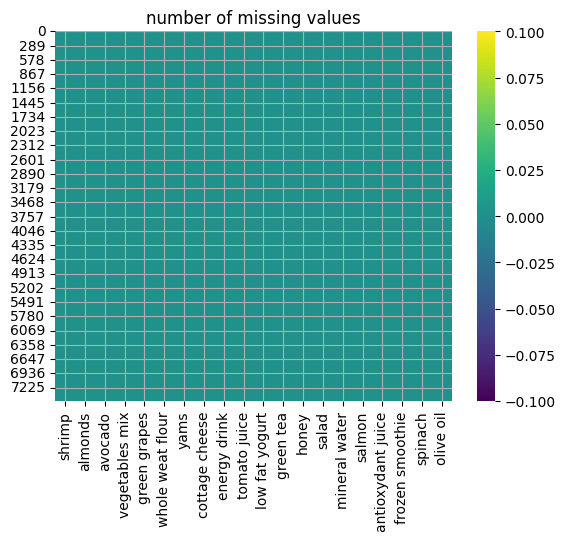

In [9]:
df.isnull().sum()
sns.heatmap(df.isnull(),cmap='viridis')
plt.grid()
plt.title("number of missing values")

BINARY MATRIX FORMAT

In [10]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,low fat yogurt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            7500 non-null   object 
 2   avocado            7500 non-null   object 
 3   vegetables mix     7500 non-null   object 
 4   green grapes       7500 non-null   object 
 5   whole weat flour   7500 non-null   object 
 6   yams               7500 non-null   object 
 7   cottage cheese     7500 non-null   object 
 8   energy drink       7500 non-null   object 
 9   tomato juice       7500 non-null   object 
 10  low fat yogurt     7500 non-null   object 
 11  green tea          7500 non-null   object 
 12  honey              7500 non-null   object 
 13  salad              7500 non-null   object 
 14  mineral water      7500 non-null   object 
 15  salmon             7500 non-null   object 
 16  antioxydant juice  7500 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
f = pd.get_dummies(df, columns = ['shrimp','almonds','avocado','vegetables mix','green grapes','whole weat flour',
                                   'yams','cottage cheese','energy drink','tomato juice','low fat yogurt','green tea','honey','salad','mineral water','salmon',
                                   'antioxydant juice','frozen smoothie','spinach','olive oil'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,olive oil
count,7500.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [16]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,low fat yogurt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


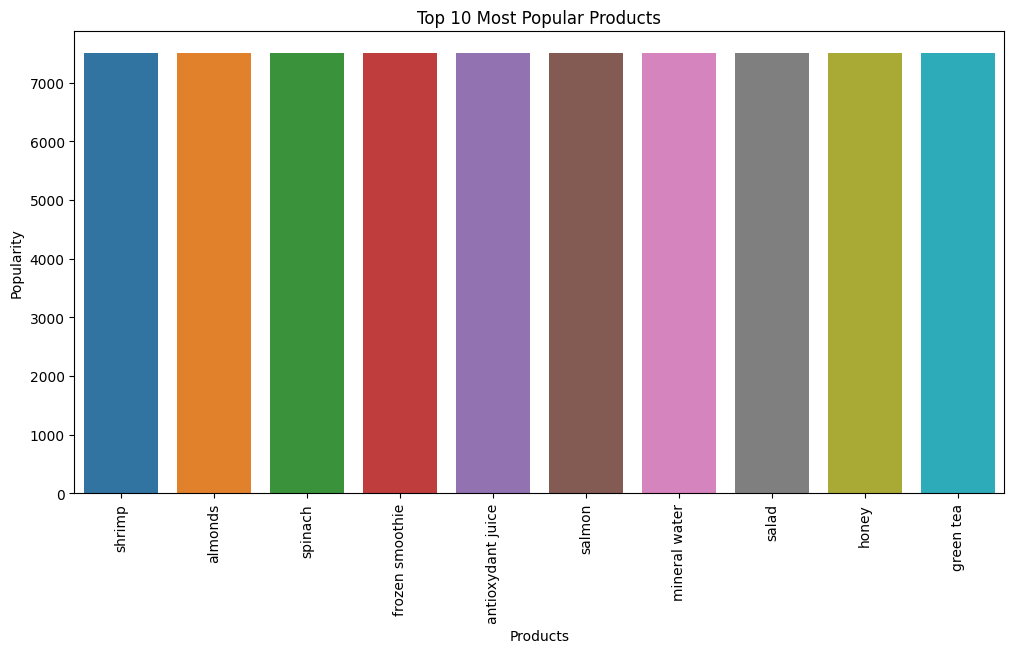

In [17]:
product_popularity = df.apply(pd.Series.value_counts).sum()
sorted_products = product_popularity.sort_values(ascending=False)
top_n = 10
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_products.index[:top_n], y=sorted_products.values[:top_n])
plt.xticks(rotation=90)
plt.xlabel('Products')
plt.ylabel('Popularity')
plt.title(f'Top {top_n} Most Popular Products')
plt.show()

ASSOCIATION RULE MINING

In [18]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
df = pd.read_csv('/content/drive/MyDrive/lab3 ml dataset.zip')

transactions = []
for idx, row in df.iterrows():
    transactions.append(row.dropna().tolist())
te = TransactionEncoder()
oht_array = te.fit(transactions).transform(transactions)
oht_df = pd.DataFrame(oht_array, columns=te.columns_)

frequent_itemsets = apriori(oht_df, min_support=0.05, use_colnames=True)

association_rules_df = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

sorted_rules = association_rules_df.sort_values(by='lift', ascending=False)

num_top_rules = 10
print("Top Association Rules:")
print(sorted_rules.head(num_top_rules))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top Association Rules:
       antecedents      consequents  antecedent support  consequent support  \
5      (spaghetti)  (mineral water)            0.174133            0.238267   
4  (mineral water)      (spaghetti)            0.238267            0.174133   
0  (mineral water)      (chocolate)            0.238267            0.163867   
1      (chocolate)  (mineral water)            0.163867            0.238267   
2  (mineral water)           (eggs)            0.238267            0.179733   
3           (eggs)  (mineral water)            0.179733            0.238267   

    support  confidence      lift  leverage  conviction  zhangs_metric  
5  0.059733    0.343032  1.439698  0.018243    1.159468       0.369806  
4  0.059733    0.250699  1.439698  0.018243    1.102184       0.400941  
0  0.052667    0.221041  1.348907  0.013623    1.073398       0.339566  
1  0.052667    0.321400  1.348907  0.013623    1.122506       0.309351  
2  0.050933    0.213766  1.189351  0.008109    1.043286   

INTERPRETATION OF ASSOCIATION RULES

In [19]:
for index, rule in association_rules_df.iterrows():
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])
    support = rule['support']
    confidence = rule['confidence']
    lift = rule['lift']

    print(f"Rule: {antecedents} -> {consequents}")
    print(f"Support: {support:.3f}")
    print(f"Confidence: {confidence:.3f}")
    print(f"Lift: {lift:.3f}")
    print("\n")

Rule: ['mineral water'] -> ['chocolate']
Support: 0.053
Confidence: 0.221
Lift: 1.349


Rule: ['chocolate'] -> ['mineral water']
Support: 0.053
Confidence: 0.321
Lift: 1.349


Rule: ['mineral water'] -> ['eggs']
Support: 0.051
Confidence: 0.214
Lift: 1.189


Rule: ['eggs'] -> ['mineral water']
Support: 0.051
Confidence: 0.283
Lift: 1.189


Rule: ['mineral water'] -> ['spaghetti']
Support: 0.060
Confidence: 0.251
Lift: 1.440


Rule: ['spaghetti'] -> ['mineral water']
Support: 0.060
Confidence: 0.343
Lift: 1.440




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


VISUALIZE ASSOCIATION RULES

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


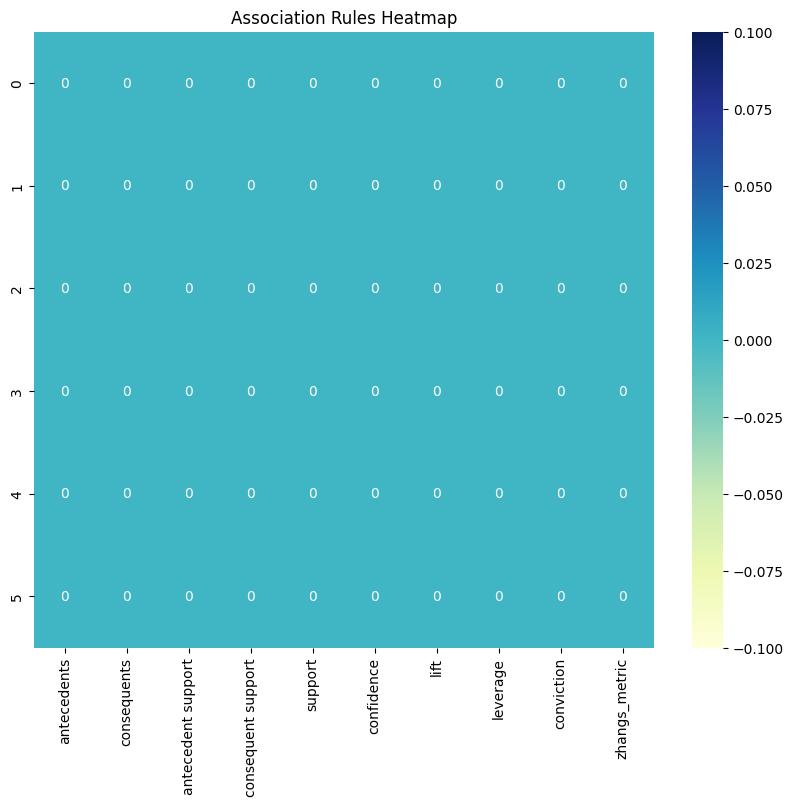

In [20]:
binary_matrix = association_rules_df.applymap(lambda x: 1 if x in association_rules_df['antecedents'][0] or x in association_rules_df['consequents'][0] else 0)
plt.figure(figsize=(10, 8))
sns.heatmap(binary_matrix, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Association Rules Heatmap')
plt.show()

BAR CHART FOR PRODUCT POPULARITY AND FREQUENCY

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


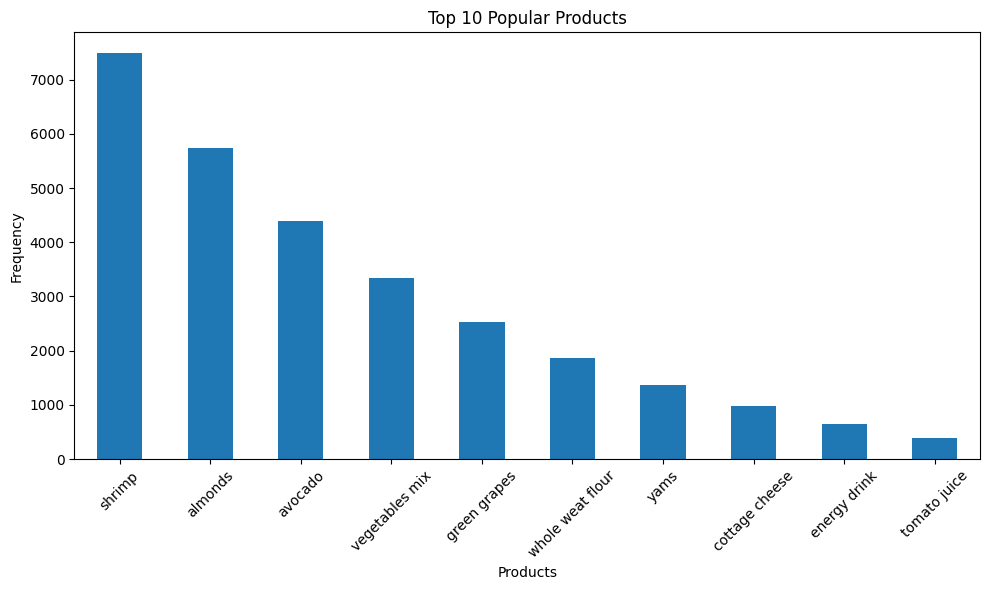

In [21]:
product_counts = df.apply(pd.Series.value_counts).sum().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
product_counts.head(10).plot(kind='bar')
plt.title('Top 10 Popular Products')
plt.xlabel('Products')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


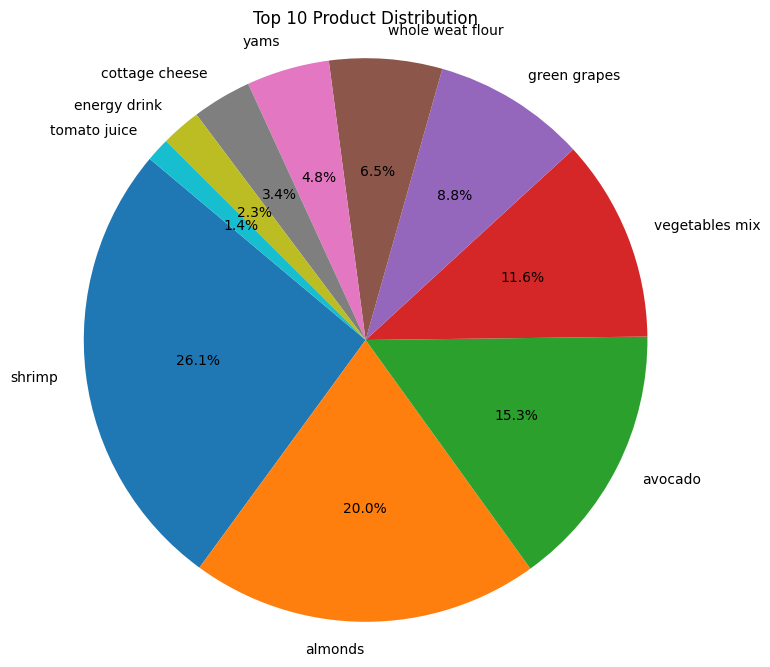

In [22]:
product_counts = df.apply(pd.Series.value_counts).sum().sort_values(ascending=False)

# Select the top 10 products
top_10_products = product_counts.head(10)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_products, labels=top_10_products.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Product Distribution')
plt.axis('equal')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


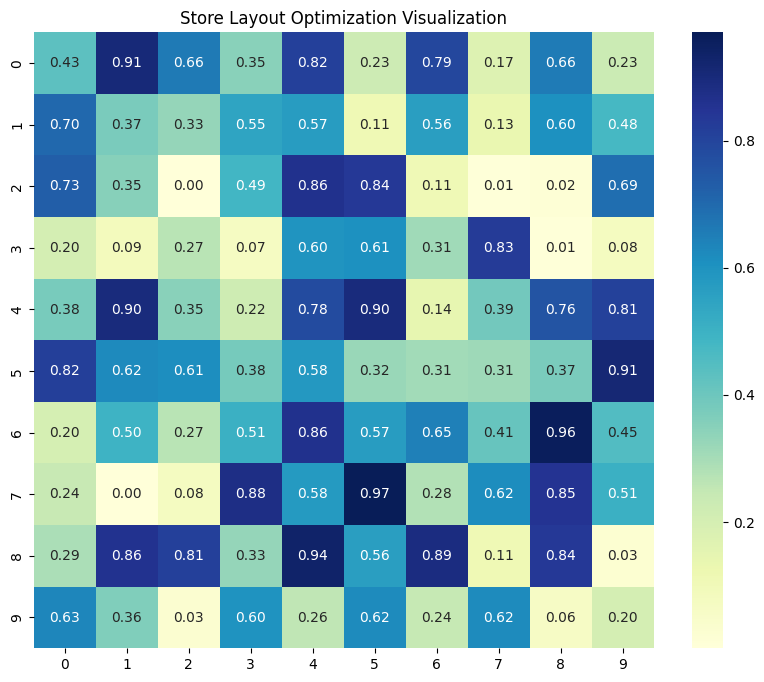

In [23]:
store_layout = np.random.rand(10, 10)  # Replace with your actual store layout data

# Create a heatmap-like visualization of the store layout
plt.figure(figsize=(10, 8))
sns.heatmap(store_layout, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Store Layout Optimization Visualization')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


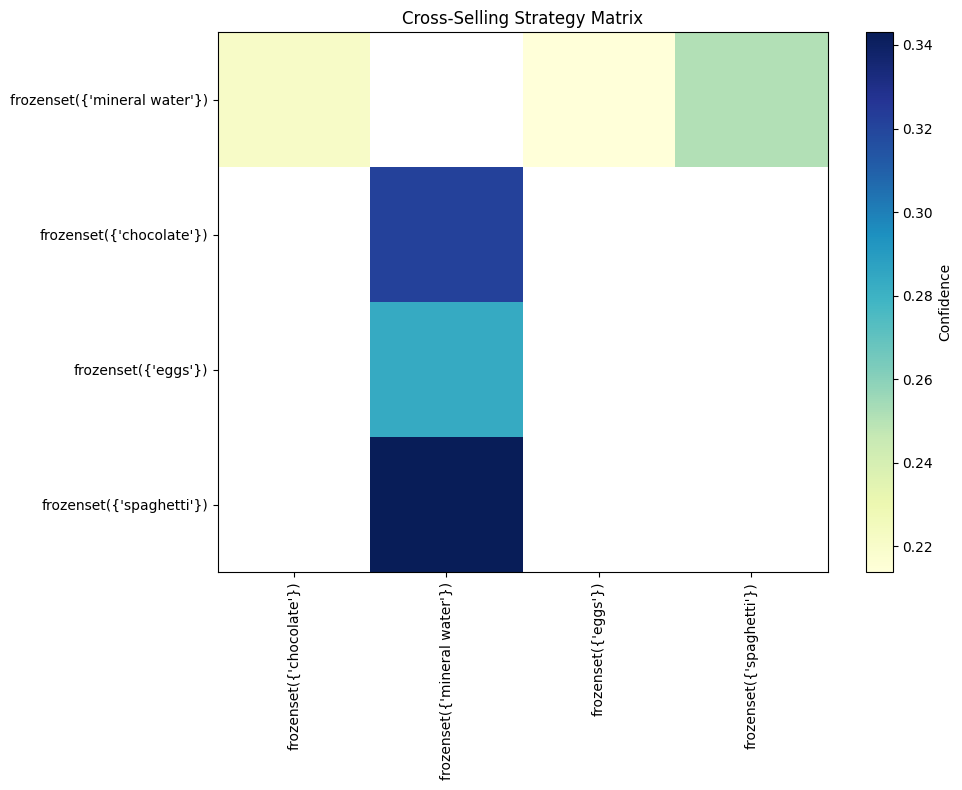

In [24]:
matrix_df = association_rules_df.pivot(index='antecedents', columns='consequents', values='confidence')

# Create the matrix plot
plt.figure(figsize=(10, 8))
plt.imshow(matrix_df, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Confidence')
plt.xticks(range(len(matrix_df.columns)), matrix_df.columns, rotation=90)
plt.yticks(range(len(matrix_df.index)), matrix_df.index)
plt.title('Cross-Selling Strategy Matrix')
plt.tight_layout()
plt.show()